# Assignment 6: Implement a Breadth-first Search Algorithm


In this exercise, we will begin to explore the concept of hashing and how it related to various object containers with respect to computational complexity.  We will begin with the base code for as described in Chapter 5 of Grokking Algorithms (Bhargava 2016).  


## Deliverables:

 

    1) Create a five level 'connections' graph (all unique, no duplicates).
    
        * The first level should have five people and each person in first level should have five connections
          (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates)
          Each person in the second level should have five connections (they can be exclusive to one person or shared with other members on the same level, but all five should be unique, no duplicates).

        * Continue the same for third, fourth, and fifth levels
        * There should be no reverse connections (i.e. first level can connect to second level but second cannot have any reverse connection with the first, and so on for 3rd, 4th, and 5th levels)

    2) Now search for three people on each level and capture the time for each search.
    
    3) Organize the results of the study into an table showing the 'name' that you searched for, the level of the search (first, second, third, fourth, fifth), and the time it took.
       Discuss any findings.

    4) Using the average time for each level, create a plot and compare times at each level (five bars or any other suitable visual).  Discuss any findings.


    
### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. Setup: Library imports and tree generation

In [65]:
import numpy as np
import pandas as pd

import seaborn as sns
import time

import random
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

from collections import deque

tree = nx.balanced_tree(5,5) #generates a balanced tree of 5 levels of 5 connections for each node


### Figure 1: The balanced tree (5 connections at 5 levels)

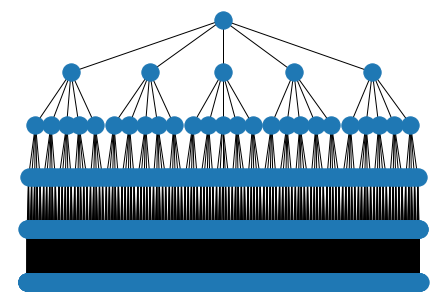

In [66]:
#plots the tree
pos = graphviz_layout(tree, prog="dot")
nx.draw(tree, pos)
plt.show()

# B. Assemble dictionary and randomly select nodes

In [67]:
edges = list(tree.edges())

graph = {}

for key, val in edges:
    graph.setdefault(key,[]).append(val)
    

In [68]:
lvl2_rands = list(np.random.randint(low=6, high= (5**2), size=3)) #randomly choose 3 integers in the 2nd layer
lvl3_rands = list(np.random.randint(low=5**2, high= 5**3, size=3)) #randomly choose 3 integers in the 3rd layer
lvl4_rands = list(np.random.randint(low=5**3, high= 5**4, size=3)) #randomly choose 3 integers in the 4th layer
lvl5_rands = list(np.random.randint(low=5**4, high= 5**5, size=3)) #randomly choose 3 integers in the 5th layer

### Table 1: The chosen search elements at each level of the graph

In [69]:
#Generate a dataframe in long format for the randomly chosen elements (first row is an exception, first middle last are populated.)
searches = {
    'Level1': [1,3,5],
    'Level2': [lvl2_rands[0], lvl2_rands[1], lvl2_rands[2]],
    'Level3': [lvl3_rands[0], lvl3_rands[1], lvl3_rands[2]],
    'Level4': [lvl4_rands[0], lvl4_rands[1], lvl4_rands[2]],
    'Level5': [lvl5_rands[0], lvl5_rands[1], lvl5_rands[2]],
}

df= pd.DataFrame.from_dict(searches)

searches_long= df.melt()
searches_long

,variable,value
0,Level1,1
1,Level1,3
2,Level1,5
3,Level2,15
4,Level2,21
5,Level2,24
6,Level3,54
7,Level3,33
8,Level3,77
9,Level4,374


In [70]:
def search_graph(G=graph, name=5):
    init = 0
    search_queue = deque() #creates a queue
    search_queue += graph.get(init) #populates the queue initially with the first level values
    searched_list = [] #creates an empty list to store searches (if there are no backconnections this shouldn't be needed)
    start = time.perf_counter() #creates a start time
    while search_queue: #while queue is not empty
        check_name = search_queue.popleft() #remove leftmost item as check_name
        if not check_name in searched_list: #if we haven't found check_name before and check_name is name we are done; return the check_name and duration as a tuple
            if check_name == name:
                end= time.perf_counter()
                duration = (end-start)*1E3
                return check_name, duration
            else: #otherwise if check_name isn't name add the children of check_name if it's a non-terminal node to the queue and append check_name to the searched_list
                if check_name in graph.keys():
                    search_queue += graph.get(check_name)
                    searched_list.append(check_name)
                else:
                     search_queue = search_queue #otherwise if it's a terminal node (is not a key in the dictionary) just append check_name to the searched_list.
                     searched_list.append(check_name)
            
    return print('Name not found in graph') #if the queue empties without finding the item return not found statement

In [71]:
search_graph(name=1143)

(1143, 11.927699999887409)

In [72]:
searches = []
times = []
for i in searches_long.value.to_list(): #loops through the Elements and collects the element and the time required to find it in searches and times respectively
    #print('looking for:', i)
    temp = search_graph(name= i)
    #print('done with:' , i)
    searches.append(temp[0])
    times.append(temp[1])

### Table 2: SearchElements and the Time required for searching

In [73]:
search_dict = {
    'SearchElement': searches,
    'Time(ms)': times
}
search_df = pd.DataFrame.from_dict(search_dict)
search_df

,SearchElement,Time(ms)
0,1,0.0016
1,3,0.0050
2,5,0.0051
3,15,0.0193
4,21,0.0283
5,24,0.0327
6,54,0.1073
7,33,0.0492
8,77,0.1794
9,374,2.6571


### Figure 2: Time required to search the tree for a given element

<AxesSubplot:xlabel='SearchElement', ylabel='Time(ms)'>

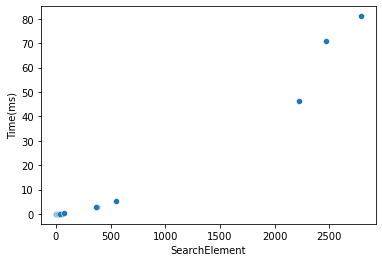

In [74]:
sns.scatterplot(data=search_df, x='SearchElement', y='Time(ms)')

### Figure 3: Mean Search Time by level of node (log scale)

Text(0.5, 1.0, 'Mean Search Time (ms) by Level')

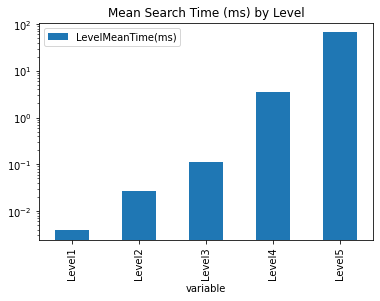

In [75]:
merged_df = pd.merge(searches_long, search_df, how='left', left_on='value', right_on='SearchElement')
agg_df = merged_df.groupby('variable').agg(func='mean')
agg_df = agg_df[['Time(ms)']]
agg_df.rename(columns={'Time(ms)':'LevelMeanTime(ms)'}, inplace=True)
agg_df.plot.bar(log=True).set_title('Mean Search Time (ms) by Level')


### Table 3: Search Time for each SearchElement in it's given Level.

In [76]:
merged_df.sort_values(by=['SearchElement'], inplace=True)
merged_df.drop('value', inplace=True, axis=1)
merged_df


,variable,SearchElement,Time(ms)
0,Level1,1,0.0016
1,Level1,3,0.0050
2,Level1,5,0.0051
3,Level2,15,0.0193
4,Level2,21,0.0283
5,Level2,24,0.0327
7,Level3,33,0.0492
6,Level3,54,0.1073
8,Level3,77,0.1794
11,Level4,364,2.7125


# C. Discussion

Networks, graphs and trees are becomming more and more prevelent as data structures for analytics. Topics such as logistics for operations, organization structure for HR, and social media influencers for marketing are all topics that can be modeled with networks/graphs. In this experiment we generated a balanced tree by populating 5 levels from a single node with connections to 5 children nodes in a subsequent level. A graphical representation of this balanced tree is shown in Figure 1. A breadth first search algorithm was programmed to search for 3 elements at each level. The time required to search for these elements within the tree is displayed in Table 3. Since we are required to add all child nodes of parent nodes before proceeding on to subsequent layers, and we are growing our number of nodes and connections at a rate of 5^(n) for every layer added, it appears that the rate of growth in time complexity is an exponential function. This is simply because we are growing exponentially by choice in the creation of our balanced tree. What drives the accumulation of time in this algorithm is the number of queueing/dequeueing operations performed which is the sum of the number of verticies and edges that are requred to be searched. In the BFS algorithm, we first populate our queue with the first row of elements, then as we remove an individual element we add all of that elements children nodes to the end of a queue. For every element searched and removed from the queue, 5 more elements are added. The search continues until the final layer is reached when we no longer have child additions to the queue. We will continue to deplete the queue after testing each element until the final child is tested. A few plots are presented to describe the growth in time of the search operation. The time required to search for a given node number is shown in Figure 2 and the mean time required for the 3 elements selected from each layer is presented in figure 3 (log scale).

## Code Graveyard

In [77]:
#Level1 = []
#for i in range(1,6):
#    i = str(i)
#    Level1.append('A'+i)



#Level1_idx = np.random.randint(low=1, high= len(Level1), size=3)

#Level1_rands = ['A1', 'A3', 'A5']


In [78]:
#Level2 = []
#prefix = []
#for i in Level1:
#    prefix.append('B'+i[-1])

#new_children = []
#for i in range(1,6):
#    new_children.append(i)
#Level2 = [p+str(c) for p in prefix for c in new_children]

#len(Level2) == 5**2
#Level2_idx = np.random.randint(low=1, high= len(Level2), size=3)
#Level2_rands = [Level2[i] for i in Level2_idx]
#print('The random objects are:', Level2_rands)

In [79]:
#Level3 = []
#prefix = []
#for i in Level2:
#    prefix.append('C'+i[-2:])

#new_children = []
#for i in range(1,6):
#    new_children.append(i)
#Level3 = [p+str(c) for p in prefix for c in new_children]



#len(Level3) == 5**3
#Level3_idx = np.random.randint(low=1, high= len(Level3), size=3)
#Level3_rands = [Level3[i] for i in Level3_idx]
#print('The random objects are:', Level3_rands)

In [80]:
#Level4 = []
#prefix = []
#for i in Level3:
#    prefix.append('D'+i[-3:])

#new_children = []
#for i in range(1,6):
#    new_children.append(i)
#Level4 = [p+str(c) for p in prefix for c in new_children]

#5**4 == len(Level4)

#Level4_idx = np.random.randint(low=1, high= len(Level4), size=3)
#Level4_rands = [Level4[i] for i in Level4_idx]
#print('The random objects are:', Level4_rands)

In [81]:
#Level5 = []
#prefix = []
#for i in Level4:
#    prefix.append('E'+i[-4:])

#new_children = []
#for i in range(1,6):
#    new_children.append(i)
#Level5 = [p+str(c) for p in prefix for c in new_children]
#5**5 == len(Level5)

#Level5_idx = np.random.randint(low=1, high= len(Level5), size=3)
#Level5_rands = [Level5[i] for i in Level5_idx]
#print('The random objects are:', Level5_rands)